In [5]:
from faster_whisper import WhisperModel

model = WhisperModel("large-v3")

segments, info = model.transcribe("C:/Users/stell/OneDrive/desktop/cans_lab/Female_Single_Speakers/F01_single105.wav", word_timestamps=True)
#print(info.segments) # before alignment

word_data = []
for segment in segments:
    for word in segment.words:
        print("%s :[%.2fs -> %.2fs] " % (word.word, word.start, word.end))
       # print(f"{word['word']}: {word['start']:.4f}s - {word['end']:.4f}s")
        word_data.append({
            "Word (Faster W)": word.word,
            "Start (Faster)": round(word.start, 7),
            "End (Faster)": round(word.end, 7)
       })

 in :[0.00s -> 0.08s] 
 the :[0.08s -> 0.18s] 
 bosom :[0.18s -> 0.56s] 
 of :[0.56s -> 0.76s] 
 one :[0.76s -> 0.96s] 
 of :[0.96s -> 1.08s] 
 those :[1.08s -> 1.36s] 
 spacious :[1.36s -> 1.76s] 
 coves :[1.76s -> 2.66s] 
 which :[2.66s -> 2.94s] 
 indent :[2.94s -> 3.22s] 
 the :[3.22s -> 3.58s] 
 eastern :[3.58s -> 3.92s] 
 shore :[3.92s -> 4.42s] 
 of :[4.42s -> 4.64s] 
 the :[4.64s -> 4.72s] 
 hudson :[4.72s -> 5.14s] 
 at :[5.14s -> 5.96s] 
 that :[5.96s -> 6.12s] 
 broad :[6.12s -> 6.50s] 
 expansion :[6.50s -> 7.04s] 
 of :[7.04s -> 7.48s] 
 the :[7.48s -> 7.58s] 
 river :[7.58s -> 7.92s] 
 denominated :[7.92s -> 9.10s] 
 by :[9.10s -> 9.34s] 
 the :[9.34s -> 9.52s] 
 ancient :[9.52s -> 9.78s] 
 dutch :[9.78s -> 10.26s] 
 navigators :[10.26s -> 10.96s] 
 the :[10.96s -> 11.12s] 
 tappan :[11.12s -> 11.54s] 
 zee :[11.54s -> 11.94s] 
 there :[11.94s -> 12.56s] 
 lies :[12.56s -> 12.92s] 
 a :[12.92s -> 13.10s] 
 small :[13.10s -> 13.44s] 
 market :[13.44s -> 13.96s] 
 town :[13

In [8]:
import pandas as pd
import os

# Creating dataframes
df_word_faster_whisper = pd.DataFrame(word_data)

df_word_faster_whisper.to_csv('faster_whisper_timings.csv', index = False, float_format="%.7f")

output_path = 'compare_timings.csv'
#if not os.path.exists(output_path):
    # Read MFA CSV
df_faster_whisper = pd.read_csv('faster_whisper_timings.csv')

#Read all CSV for comparison
df_total = pd.read_csv(r"C:\Users\stell\OneDrive\Desktop\CANS_LAB\compare_timings.csv")

combined_timings = pd.concat([df_total, df_faster_whisper], axis=1)

combined_timings.to_csv(output_path, index=False, float_format="%.7f")

#else:
 #   print("Output file already exists. Skipping concatenation.")


start difference
 0      0.00
1     -0.08
2     -0.05
3     -0.14
4     -0.10
       ... 
159   -0.09
160   -0.11
161   -0.10
162   -0.04
163   -0.22
Length: 164, dtype: float64
End difference
 0     -0.08
1     -0.05
2     -0.14
3     -0.10
4     -0.08
       ... 
159   -0.11
160   -0.10
161   -0.04
162   -0.22
163   -0.36
Length: 164, dtype: float64


Text(0, 0.5, 'Frequency')

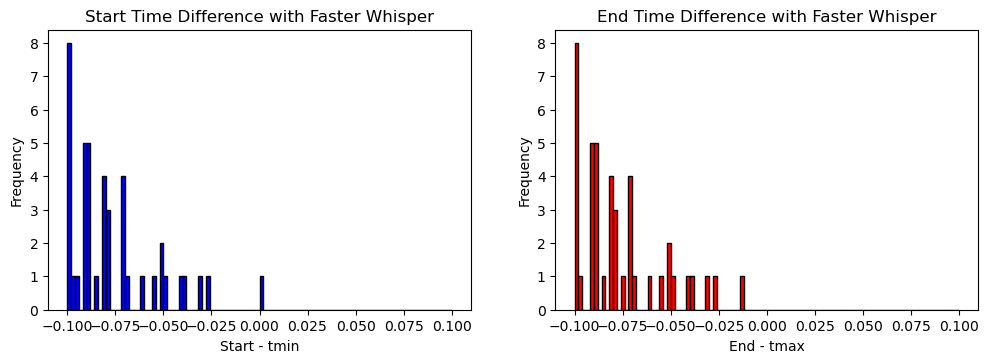

In [10]:
import matplotlib.pyplot as plt

df_total_total = pd.read_csv('compare_timings.csv')
#Read combined timings
#Get the differences
combined_df_start = df_total_total["Start (Faster)"] - df_total_total["tmin"]
print("start difference\n",combined_df_start)

combined_df_end =  df_total_total["End (Faster)"] - df_total_total["tmax"]
print("End difference\n", combined_df_end)


plt.figure(figsize=(12, 8))

# Histogram of Start difference
plt.subplot(2, 2, 1)
plt.hist(combined_df_start, bins = 100, color='blue', edgecolor='black', range=(-0.1, 0.1))
plt.title("Start Time Difference with Faster Whisper")
plt.xlabel("Start - tmin")
plt.ylabel("Frequency")

# Histogram of End difference
plt.subplot(2, 2, 2)
plt.hist(combined_df_end, bins = 100, color='red', edgecolor='black', range=(-0.1, 0.1))
plt.title("End Time Difference with Faster Whisper")
plt.xlabel("End - tmax")
plt.ylabel("Frequency")